Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Loading the Dataset

In [2]:
# Load training and testing datasets
train_data = pd.read_csv('NSLKDD-train.csv')
test_data = pd.read_csv('NSLKDD-test.csv')

# Display the first few rows of the training dataset
print("Training Data:")
print(train_data.head())

# Display the first few rows of the testing dataset
print("\nTesting Data:")
print(test_data.head())

Training Data:
   src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  \
0        491          0     0               0       0    0                  0   
1        146          0     0               0       0    0                  0   
2          0          0     0               0       0    0                  0   
3        232       8153     0               0       0    0                  0   
4        199        420     0               0       0    0                  0   

   logged_in  num_compromised  root_shell  ...  dst_host_srv_count  \
0          0                0           0  ...                  25   
1          0                0           0  ...                   1   
2          0                0           0  ...                  26   
3          1                0           0  ...                 255   
4          1                0           0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.1

Exploratory Data Analysis (EDA) - Dataset Overview

In [3]:
# Check dataset dimensions
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())

# Check data types
print("\nData Types in Training Data:")
print(train_data.dtypes)

Training Data Shape: (125973, 38)
Testing Data Shape: (22544, 38)

Missing Values in Training Data:
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_

EDA - Label Distribution

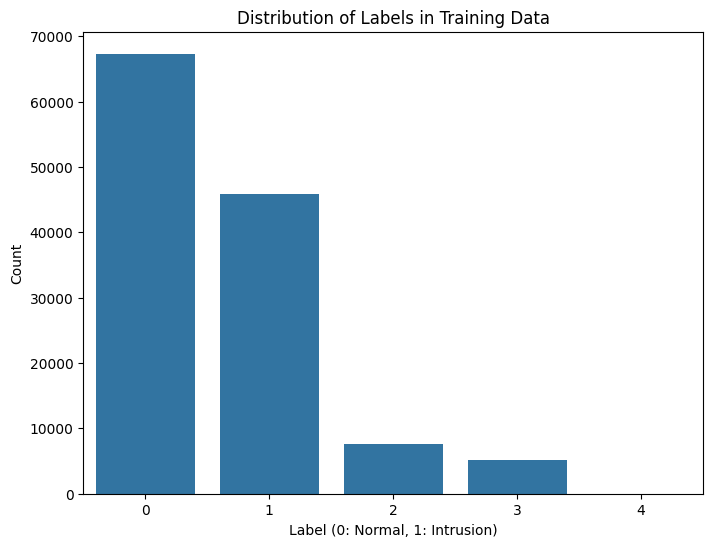

In [4]:
# Plot the distribution of labels in the training dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label_num', data=train_data)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label (0: Normal, 1: Intrusion)')
plt.ylabel('Count')
plt.show()

EDA - Correlation Matrix

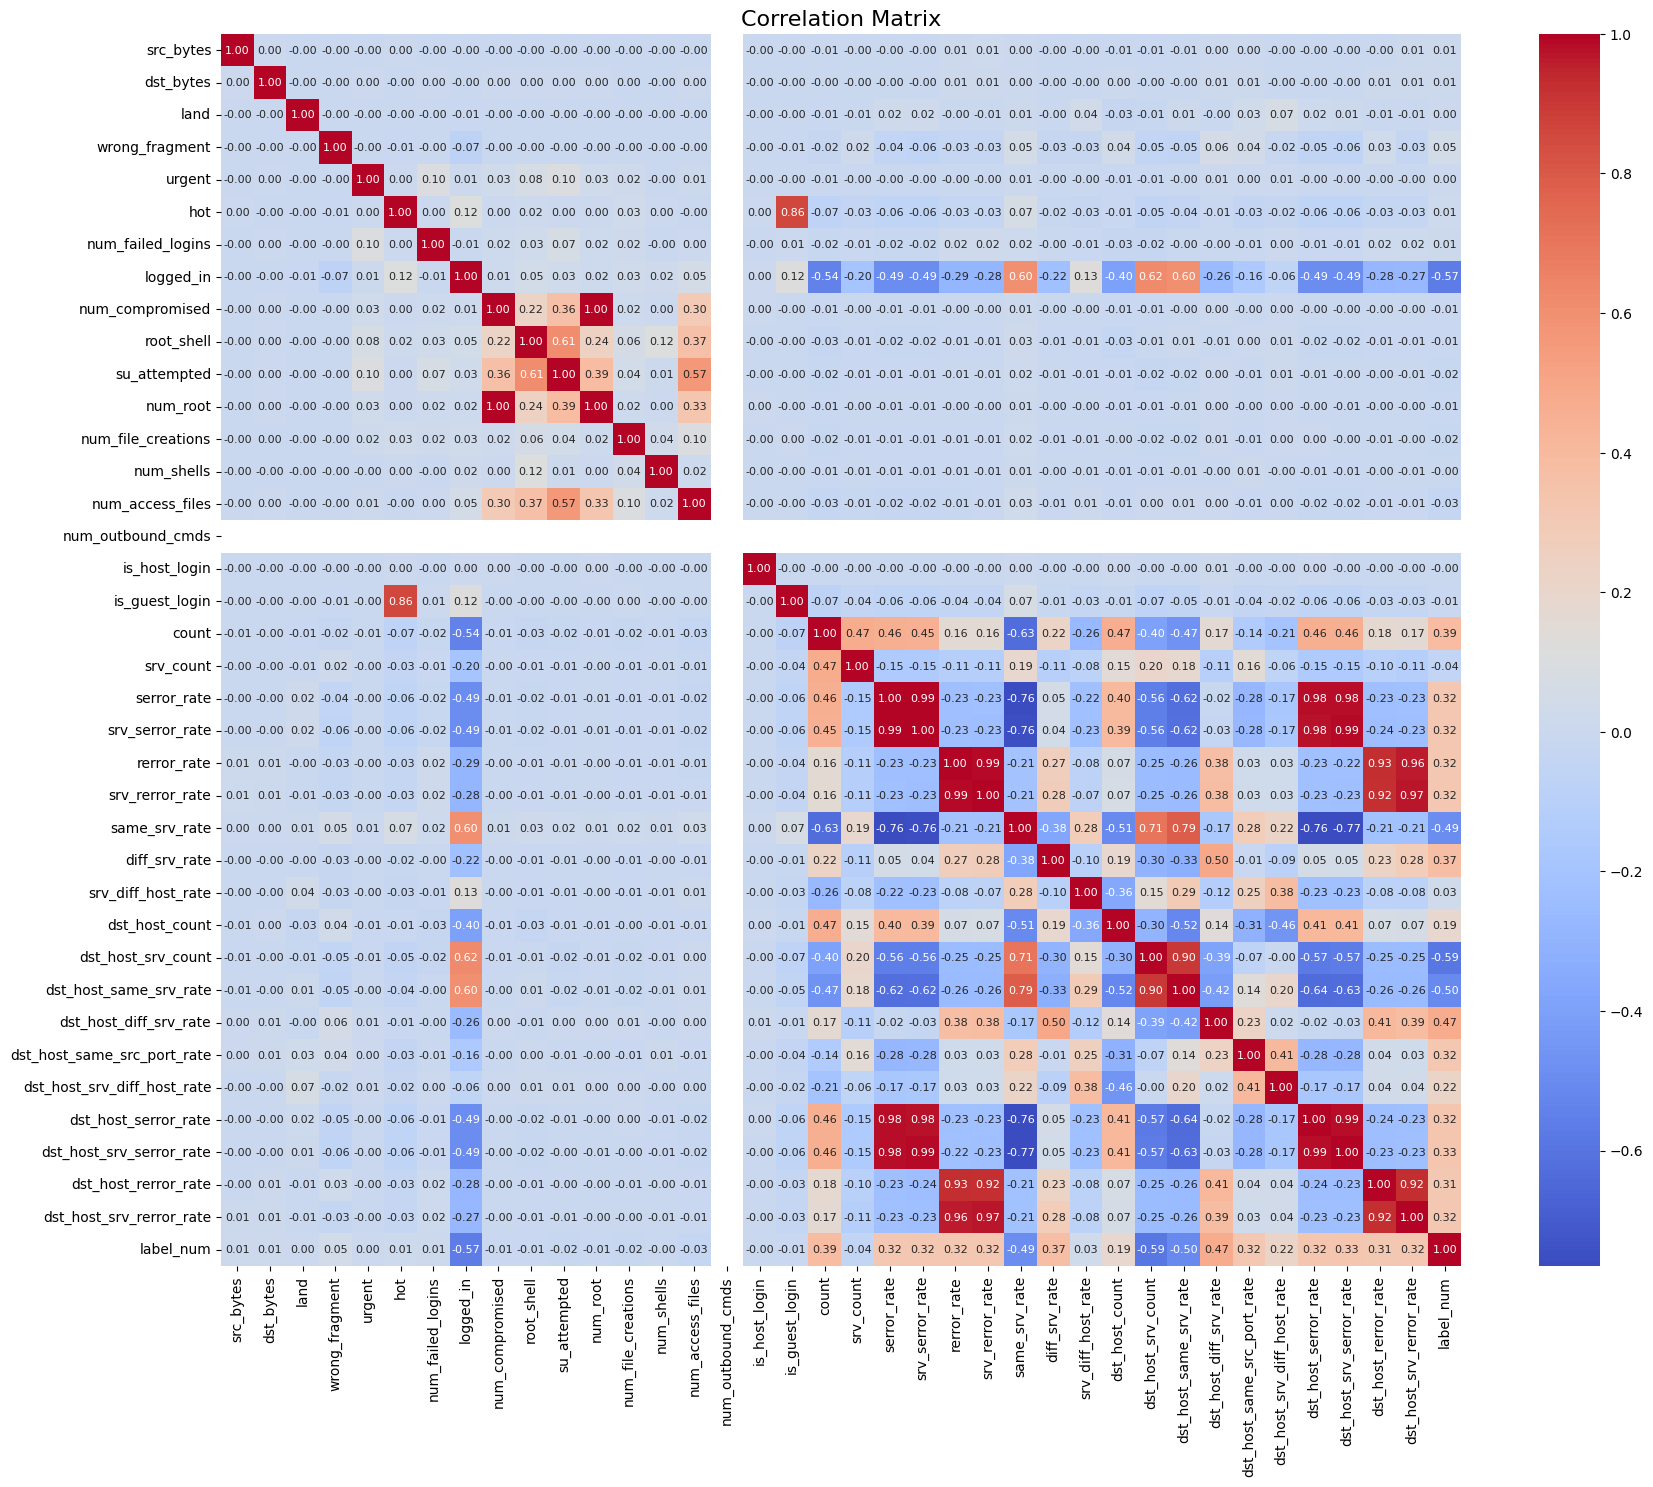

In [5]:
# Compute correlation matrix
corr_matrix = train_data.corr()

# Plot correlation matrix with annotations and larger figure size
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 8})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Feature Engineering - Handling Categorical Data

In [6]:
# Check for categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Encode categorical columns (if any)
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

Categorical Columns: Index([], dtype='object')


Feature Engineering - Feature Scaling

In [7]:
# Separate features and labels
X_train = train_data.drop('label_num', axis=1)
y_train = train_data['label_num']
X_test = test_data.drop('label_num', axis=1)
y_test = test_data['label_num']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model 1 - Random Forest Classifier

In [8]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest Classifier Results:
Accuracy: 0.7508427963094393
Precision: 0.8000646427135873
Recall: 0.7508427963094393
F1-Score: 0.7088942430762846


Confusion Matrix

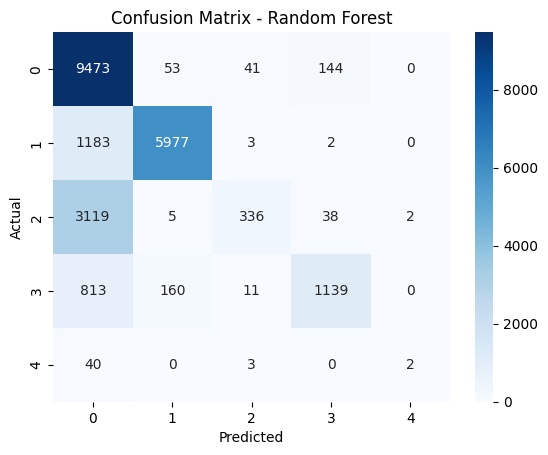

In [9]:
# Plot confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model 2 - Support Vector Machine (SVM)

In [10]:
# Train SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_svm, average='weighted'))

SVM Classifier Results:
Accuracy: 0.7266678495386799
Precision: 0.7582071572526939
Recall: 0.7266678495386799
F1-Score: 0.6883484215728876


Confusion Matrix

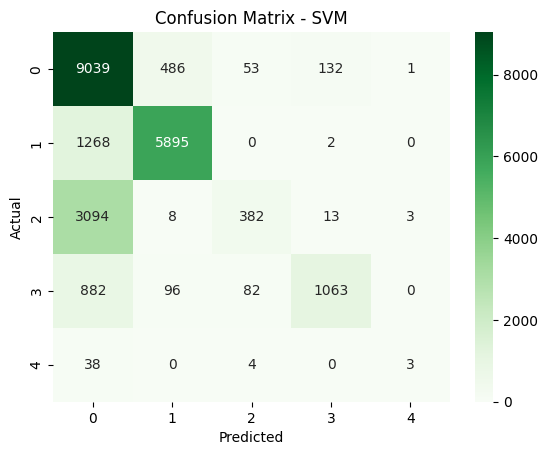

In [11]:
# Plot confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model 3 - Neural Network

In [13]:
# Train Neural Network Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
print("Neural Network Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nn, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nn, average='weighted'))

Neural Network Classifier Results:
Accuracy: 0.7358942512420156
Precision: 0.7453978789988714
Recall: 0.7358942512420156
F1-Score: 0.700023312320862


Confusion Matrix

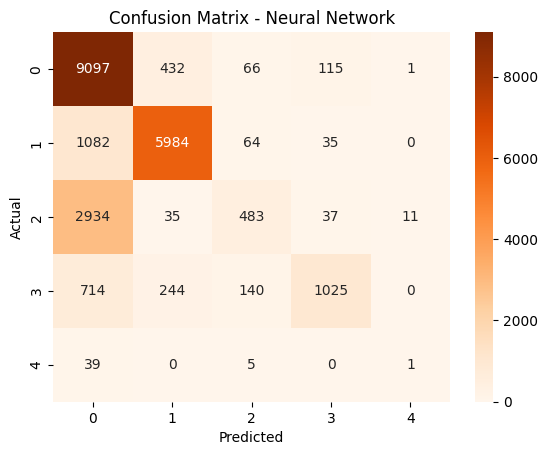

In [14]:
# Plot confusion matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance - Random Forest

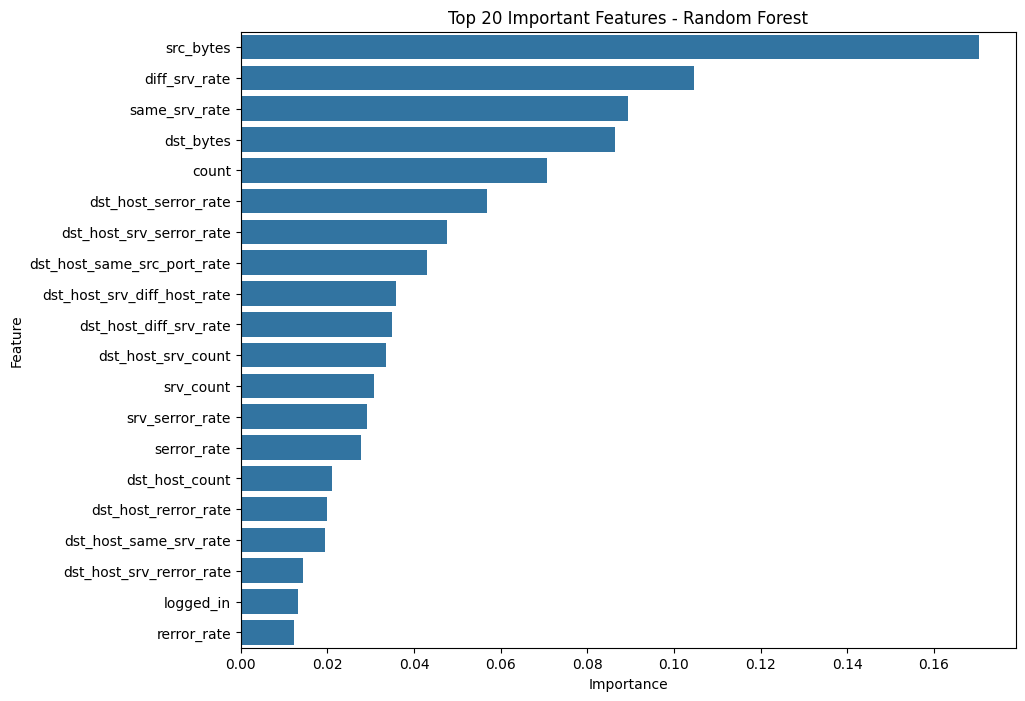

In [15]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Important Features - Random Forest')
plt.show()

Model Comparison - Accuracy

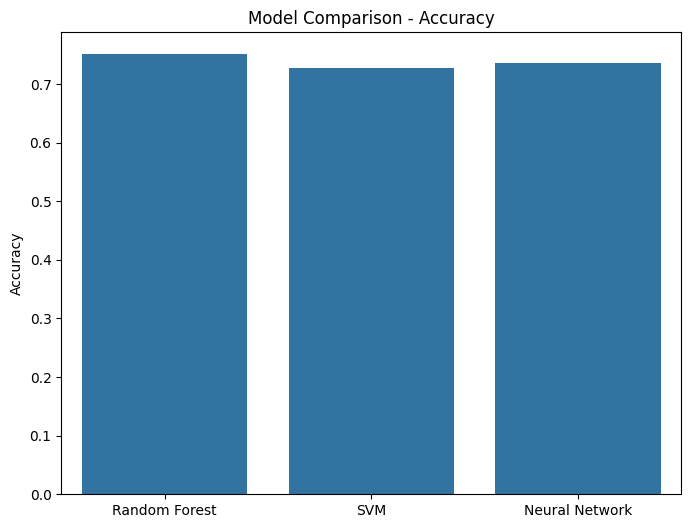

In [16]:
# Compare model accuracies
models = ['Random Forest', 'SVM', 'Neural Network']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_nn)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

Model Comparison - Precision

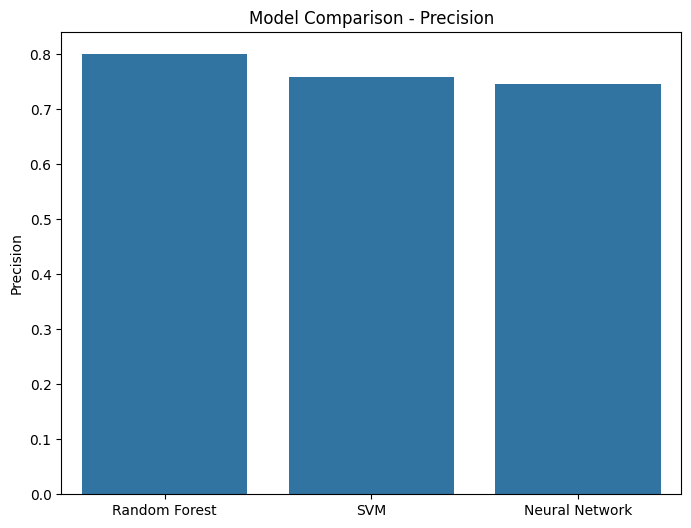

In [18]:
# Compare model precisions
precisions = [precision_score(y_test, y_pred_rf, average='weighted'),
              precision_score(y_test, y_pred_svm, average='weighted'),
              precision_score(y_test, y_pred_nn, average='weighted')]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=precisions)
plt.title('Model Comparison - Precision')
plt.ylabel('Precision')
plt.show()

Model Comparison - Recall

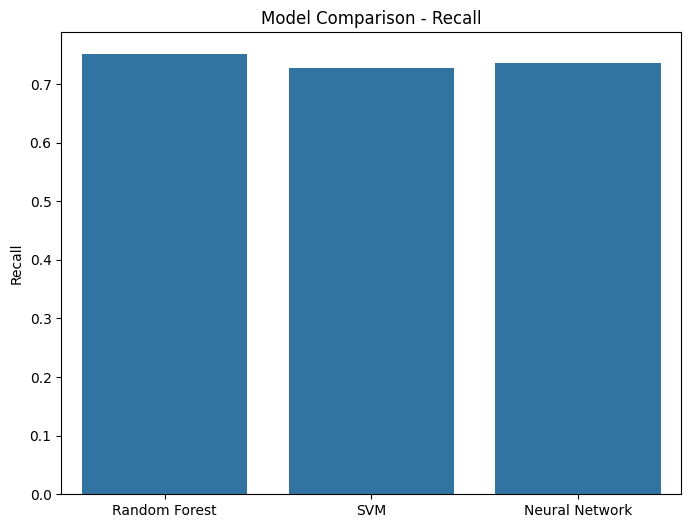

In [20]:
# Compare model recalls
recalls = [recall_score(y_test, y_pred_rf, average='weighted'),
           recall_score(y_test, y_pred_svm, average='weighted'),
           recall_score(y_test, y_pred_nn, average='weighted')]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=recalls)
plt.title('Model Comparison - Recall')
plt.ylabel('Recall')
plt.show()

Model Comparison - F1-Score

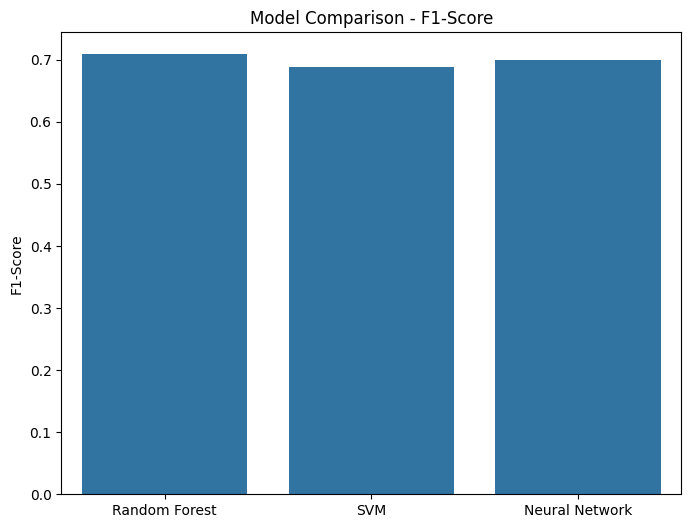

In [22]:
# Compare model F1-Scores
f1_scores = [f1_score(y_test, y_pred_rf, average='weighted'),
              f1_score(y_test, y_pred_svm, average='weighted'),
              f1_score(y_test, y_pred_nn, average='weighted')]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=f1_scores)
plt.title('Model Comparison - F1-Score')
plt.ylabel('F1-Score')
plt.show()

Real-Time Intrusion Detection System (Simulation)

In [23]:
# Simulate real-time intrusion detection
def detect_intrusion(model, data):
    prediction = model.predict(data)
    if prediction == 1:
        return "Intrusion Detected!"
    else:
        return "Normal Traffic"

# Test with a sample from the test dataset
sample_data = X_test_scaled[0].reshape(1, -1)
print("Real-Time Detection:", detect_intrusion(rf_model, sample_data))

Real-Time Detection: Intrusion Detected!
